In [72]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
video_in = 'data/marker_raw.mp4'
video_out = 'data/marker_raw_480x480_30fps.mp4'

In [10]:
def extract_nth_frame(video_path, n, output_path=None, flip=False):
    cap = cv2.VideoCapture(video_path)
    if n < 1 or n > int(cap.get(cv2.CAP_PROP_FRAME_COUNT)): return None

    for count in range(n-1):
       ret, _ = cap.read()
       if not ret or not cap.isOpened(): break

    ret, frame = cap.read()
    cap.release()
    if not ret: return None

    if flip: frame = cv2.flip(frame, 0)
    if output_path: cv2.imwrite(output_path, frame)
    return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [11]:
def thumbnail(video_path):
    plt.figure()
    plt.imshow(extract_nth_frame(video_path, 1))
    plt.show()

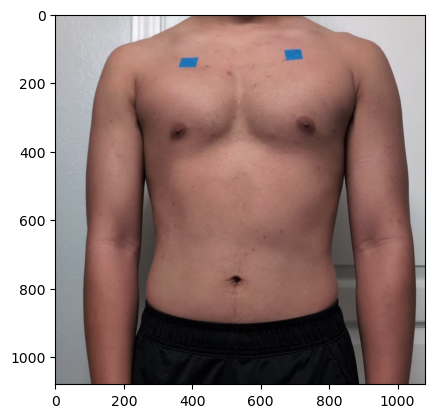

In [12]:
thumbnail(video_in)

In [89]:
def crop_video(input_path, output_path, 
               bottom_left=None, top_right=None,
               time_window=None,
               new_width=None, new_height=None,):

  cap = cv2.VideoCapture(input_path)
  if not cap.isOpened(): raise Exception(f"Could not open video: {input_path}")

  # Get video properties
  fps = cap.get(cv2.CAP_PROP_FPS)
  width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Set codec (e.g., MP4)
  print(f'original video dimensions: width:{width}, height:{height}')

  # crop video dims
  if bottom_left is None or top_right is None:
    top_right = (width, height)
    bottom_left = (0, 0)
  crop_width = top_right[0] - bottom_left[0]
  crop_height = top_right[1] - bottom_left[1]
  if (crop_width < 1 or crop_height < 1 or 
      crop_width > width or crop_height > height or
      bottom_left[0] < 0 or bottom_left[1] < 0 or
      top_right[0] > width or top_right[1] > height):
    raise Exception(f'invalid dims: width:{crop_width}, height:{crop_height}')
  print(f'new video dimensions: width:{crop_width}, height:{crop_height}')

  # crop time
  if time_window is None: time_window = (0, cap.get(cv2.CAP_PROP_FRAME_COUNT)/fps)
  frame_start = int(time_window[0] * fps)
  frame_end = int(time_window[1] * fps)

  # resize video
  if new_height is None or new_width is None:
    new_height = crop_height
    new_width = crop_width

  out = cv2.VideoWriter(output_path, fourcc, fps, (new_width, new_height))
  for frame_num in tqdm(range(frame_end)):
    if frame_num < frame_start: continue
    ret, frame = cap.read()
    if not ret: break

    cropped_frame = frame[bottom_left[1]:bottom_left[1]+crop_height, 
                          bottom_left[0]:bottom_left[0]+crop_width]
    resized_frame = cv2.resize(cropped_frame, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    out.write(resized_frame)

  cap.release()
  out.release()

original video dimensions: width:1080, height:1080
new video dimensions: width:1080, height:1080


  0%|          | 0/1415 [00:00<?, ?it/s]

100%|██████████| 1415/1415 [00:09<00:00, 155.83it/s]


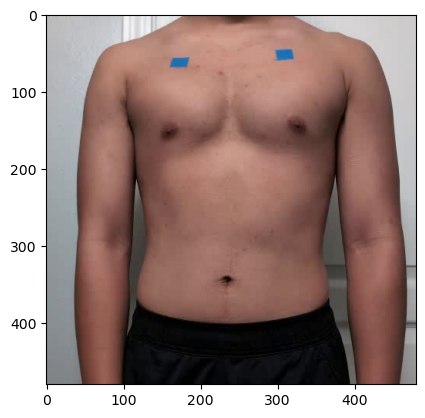

In [90]:
width = 480
height = 480

crop_video(video_in, video_out, 
           new_width=width, new_height=height)
thumbnail(video_out)